In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from pair_prediction.data.read import read_idx_file, read_matrix_file
from pair_prediction.visualization.base import draw_rna_structure
from pair_prediction.data.processing import create_rna_graph

DATA_DIR = Path("/home/inf141171/non-canonical-base-pair-prediction/data/raw/")
IDX_DIR = DATA_DIR / 'idxs'
MATRIX_DIR = DATA_DIR / 'matrices'

Sequence: CUUAUAGGGUUGGUAAAUUUUAACCCAAACUAA
Details: [{'res_number': 1, 'chain_id': 'A', 'res_type': 'C', 'res_id': '18'}, {'res_number': 2, 'chain_id': 'A', 'res_type': 'U', 'res_id': '19'}, {'res_number': 3, 'chain_id': 'A', 'res_type': 'U', 'res_id': '20'}, {'res_number': 4, 'chain_id': 'A', 'res_type': 'A', 'res_id': '21'}, {'res_number': 5, 'chain_id': 'A', 'res_type': 'U', 'res_id': '22'}, {'res_number': 6, 'chain_id': 'A', 'res_type': 'A', 'res_id': '23'}, {'res_number': 7, 'chain_id': 'A', 'res_type': 'G', 'res_id': '222'}, {'res_number': 8, 'chain_id': 'A', 'res_type': 'G', 'res_id': '223'}, {'res_number': 9, 'chain_id': 'A', 'res_type': 'G', 'res_id': '224'}, {'res_number': 10, 'chain_id': 'A', 'res_type': 'U', 'res_id': '225'}, {'res_number': 11, 'chain_id': 'A', 'res_type': 'U', 'res_id': '226'}, {'res_number': 12, 'chain_id': 'A', 'res_type': 'G', 'res_id': '227'}, {'res_number': 13, 'chain_id': 'A', 'res_type': 'G', 'res_id': '228'}, {'res_number': 14, 'chain_id': 'A', 'r

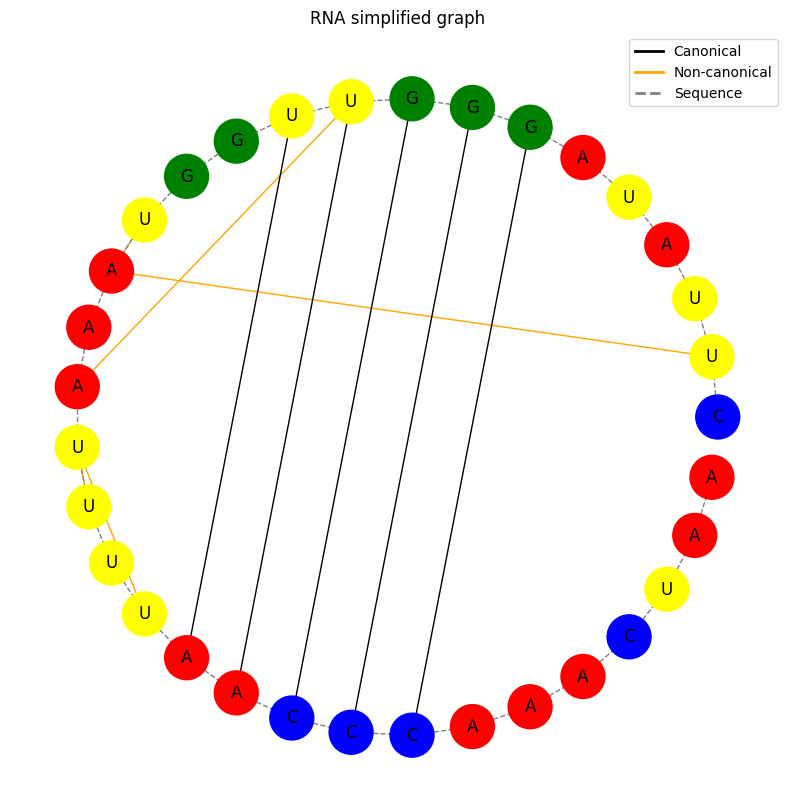

In [3]:
# Example
filename = "7PNV_1_A_A_266_C"
idx_file = IDX_DIR / f"{filename}.idx"
cmt_file = MATRIX_DIR / f"{filename}.cmt"
amt_file = MATRIX_DIR / f"{filename}.amt"

seq, details = read_idx_file(idx_file)
cmt_matrix = read_matrix_file(cmt_file)
amt_matrix = read_matrix_file(amt_file)

print("Sequence:", seq)
print("Details:", details)
print("CMT:", sum(cmt_matrix == 1))
print("AMT:", sum(amt_matrix > 1))

draw_rna_structure(seq, amt_matrix)

Text(0, 0.5, 'Nucleotide index')

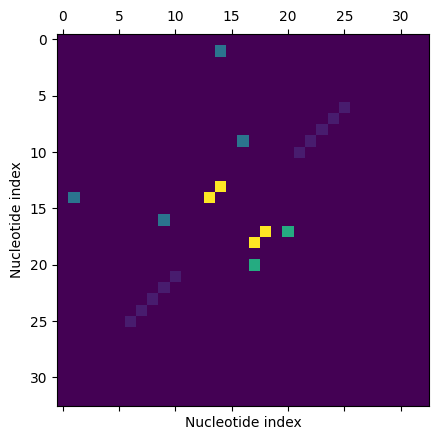

In [4]:
plt.matshow(amt_matrix)
plt.xlabel("Nucleotide index")
plt.ylabel("Nucleotide index")

In [2]:
# Read all files
sequences = []
sequences_details = []
amt_matrixes = []

for idx_file in IDX_DIR.glob("*.idx"):
    filename = idx_file.stem
    amt_file = MATRIX_DIR / f"{filename}.amt"
    try:
        seq, details = read_idx_file(idx_file)
        amt_matrix = read_matrix_file(amt_file)
        
        sequences.append(seq)
        sequences_details.append(details)
        amt_matrixes.append(amt_matrix)
    except Exception as e:
        print(f"Error of {filename}: {e}")

In [3]:
stats = []
for matrix in amt_matrixes:
    canonical_pairs_number = int(sum(sum(matrix == 1)) / 2)
    non_canonical_pairs_number = int(sum(sum(matrix > 1)) / 2)
    matrix_length = matrix.shape[0]
    stats.append({"Canonical pairs": canonical_pairs_number, "Non-canonical pairs": non_canonical_pairs_number, "Length": matrix_length})

stats_df = pd.DataFrame(stats)

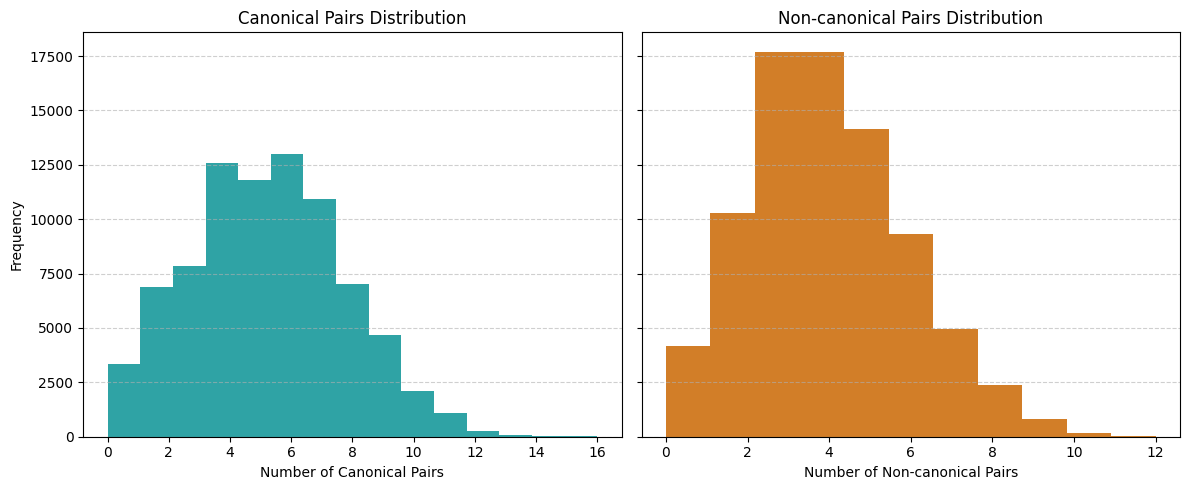

In [5]:
import numpy as np

hex_colors = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226']

canonical_counts = stats_df['Canonical pairs'].values
non_canonical_counts = stats_df['Non-canonical pairs'].values
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

bins_canonical = np.linspace(0, max(canonical_counts), max(canonical_counts))
bins_non_canonical = np.linspace(0, max(non_canonical_counts), max(non_canonical_counts))

# Canonical pairs histogram
axes[0].hist(canonical_counts, bins=bins_canonical, color=hex_colors[2], alpha=0.85)
axes[0].set_title('Canonical Pairs Distribution')
axes[0].set_xlabel('Number of Canonical Pairs')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Non-canonical pairs histogram
axes[1].hist(non_canonical_counts, bins=bins_non_canonical, color=hex_colors[6], alpha=0.85)
axes[1].set_title('Non-canonical Pairs Distribution')
axes[1].set_xlabel('Number of Non-canonical Pairs')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("pair_distribution.png", dpi=300)
plt.show()

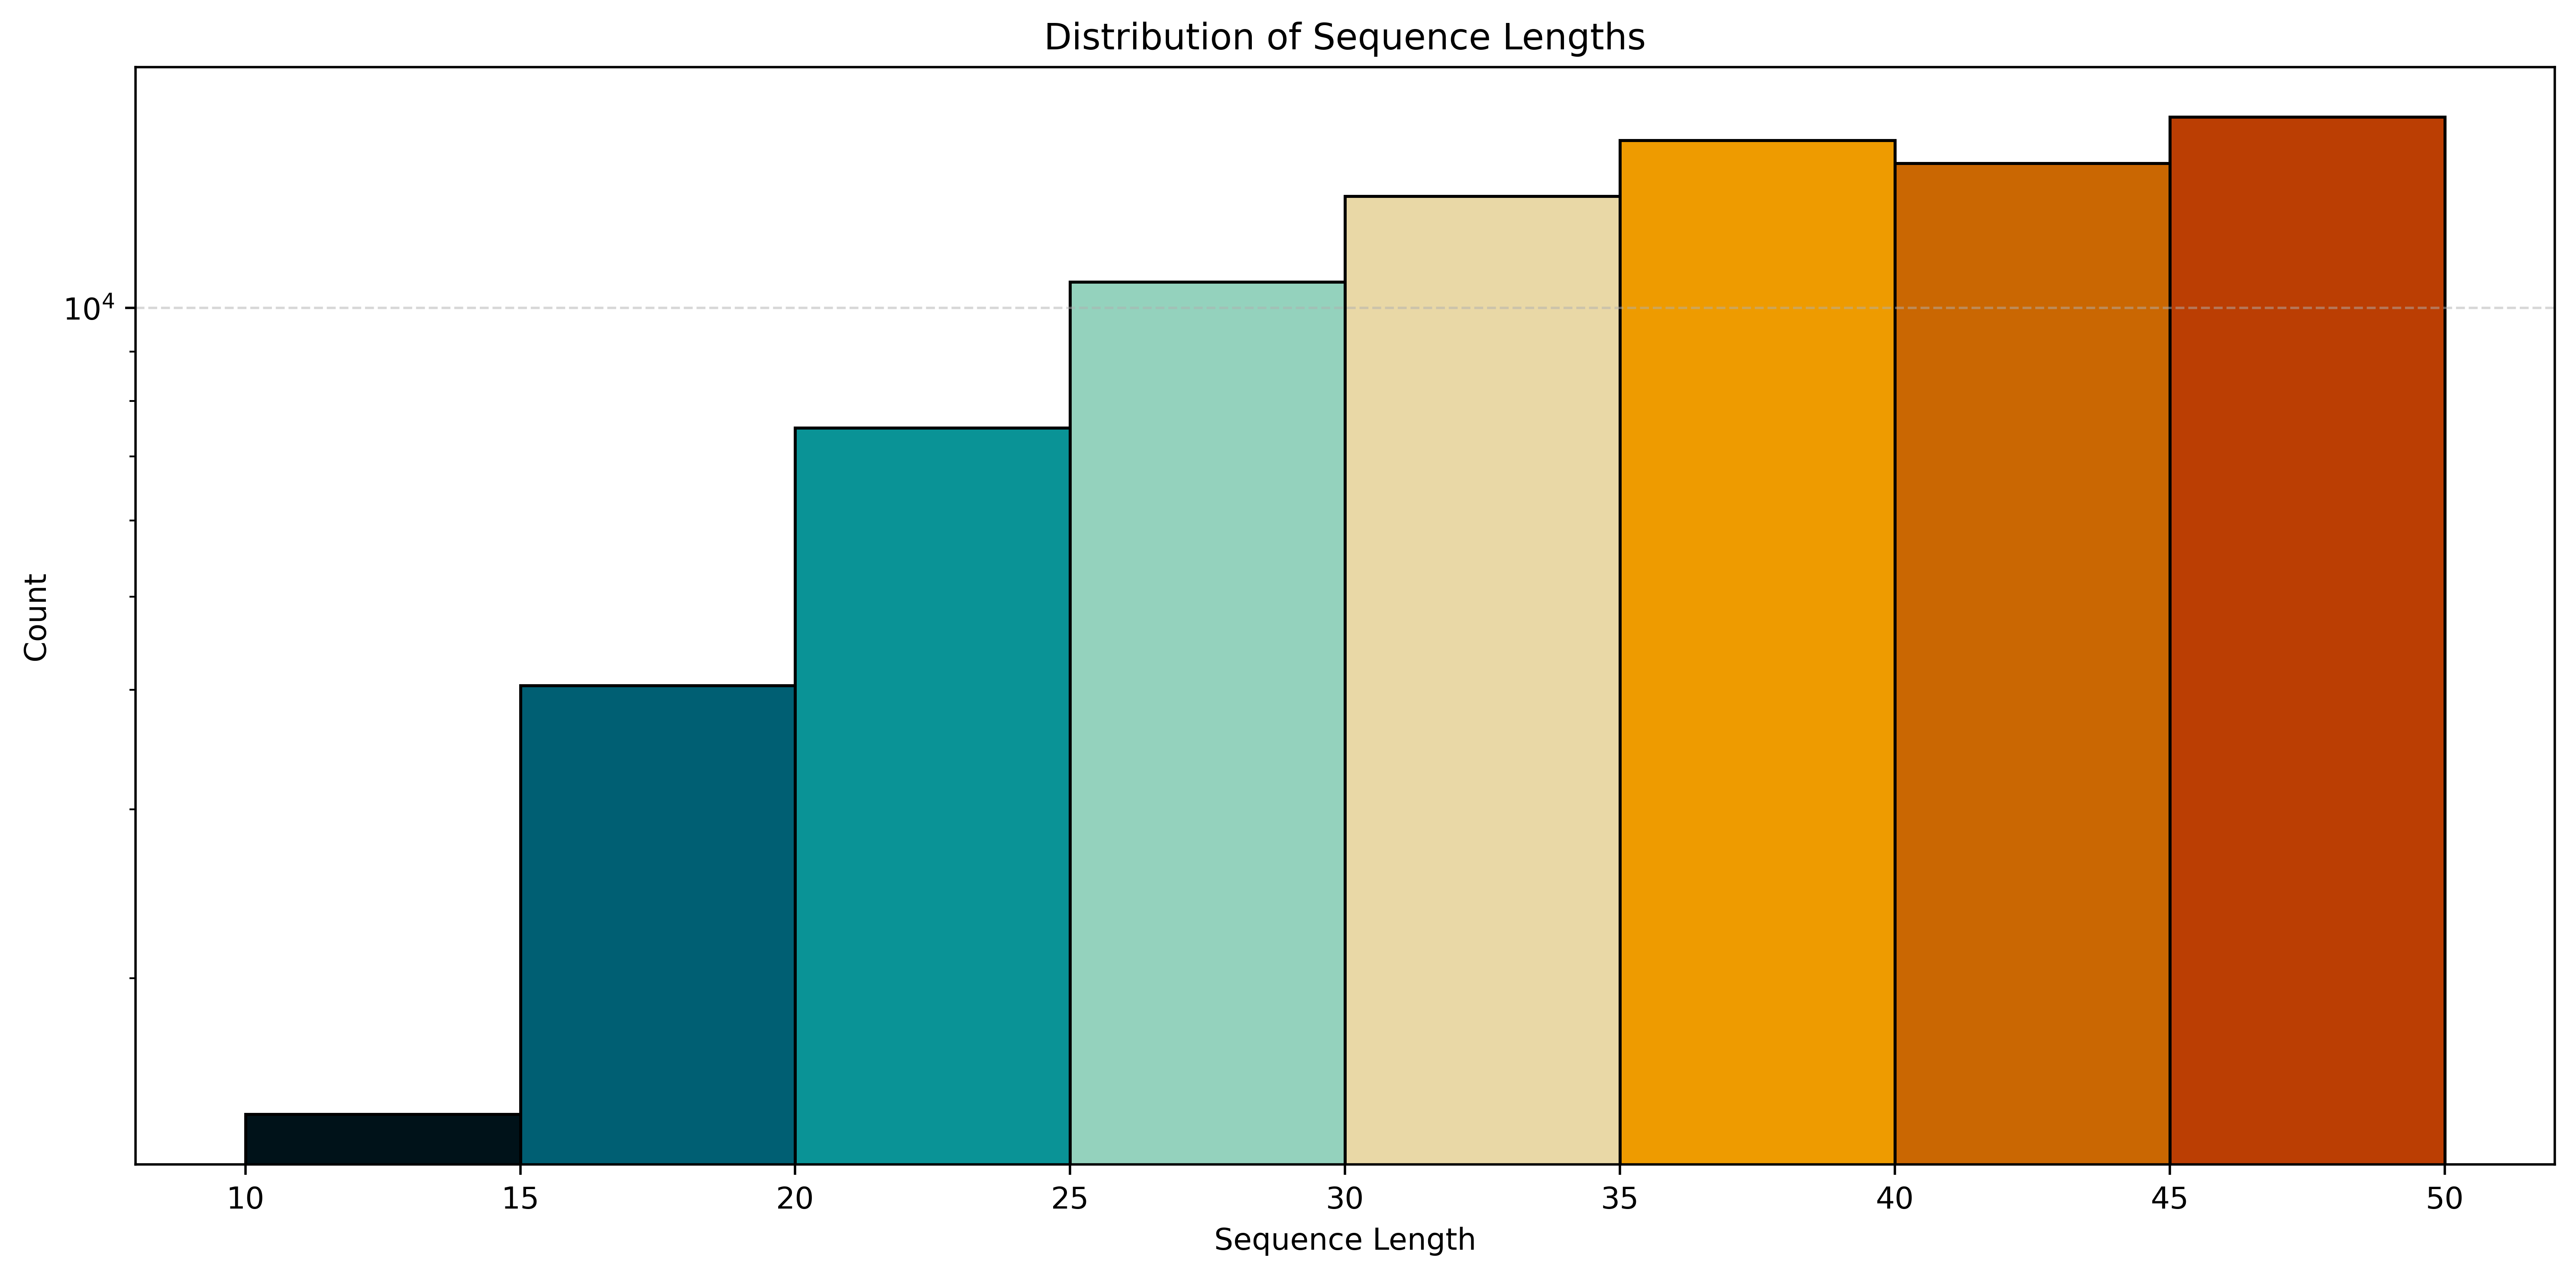

In [11]:
bin_width = 5
bin_min = stats_df.Length.min()
bin_max = stats_df.Length.max()
bin_edges = np.arange(bin_min, bin_max + bin_width, bin_width)

counts, _ = np.histogram(stats_df.Length, bins=bin_edges)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
colors = [hex_colors[i % len(hex_colors)] for i in range(len(counts))]

# Plot
plt.figure(figsize=(12, 6), dpi=500)
plt.bar(
    bin_centers,
    counts,
    width=bin_width,
    color=colors,
    edgecolor='black',
    align='center'
)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("length_distribution.png", dpi=300)
plt.show()

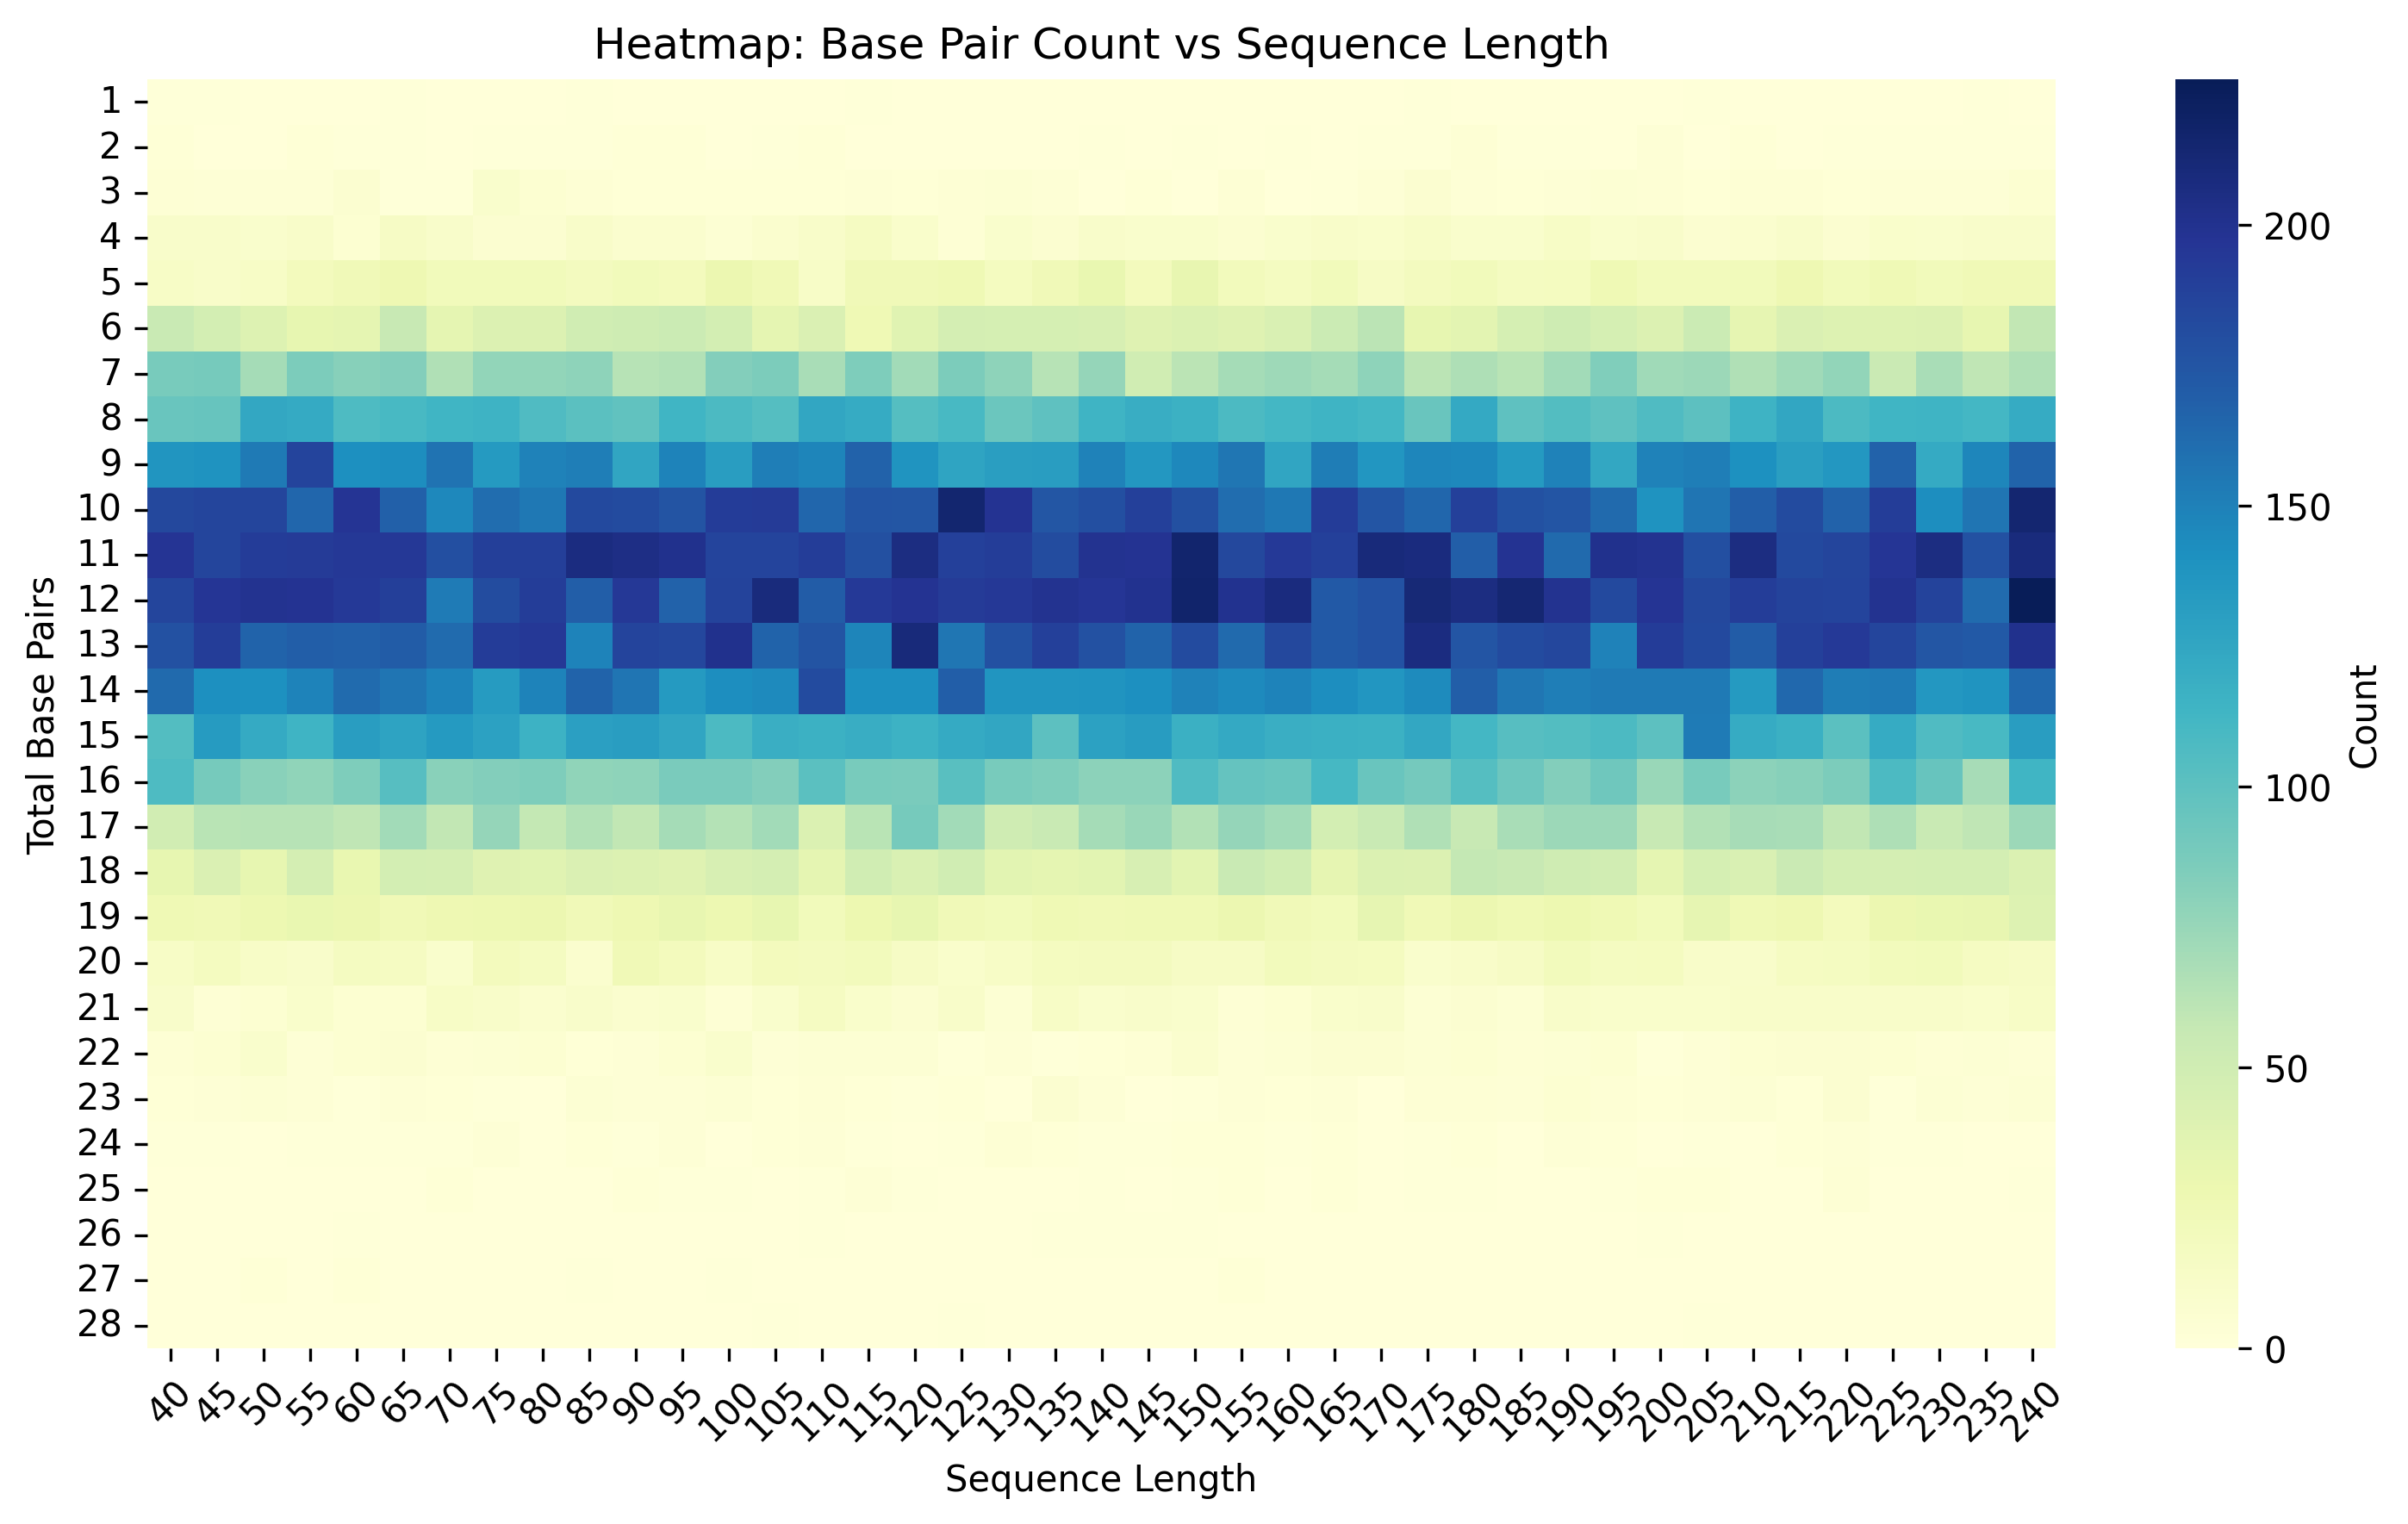

In [15]:
from matplotlib.colors import LinearSegmentedColormap

smooth_cmap = LinearSegmentedColormap.from_list("custom_smooth", hex_colors, N=256)

heatmap_data, xedges, yedges = np.histogram2d(
    stats_df['sequence_length'],
    df['total_pairs'],
    bins=[x_bins, y_bins]
)

# Plot heatmap with smooth custom color gradient
plt.figure(figsize=(10, 6), dpi=300)
sns.heatmap(
    heatmap_data.T,
    xticklabels=np.round(xedges[:-1], 1),
    yticklabels=yedges[:-1],
    cmap=smooth_cmap,
    cbar_kws={'label': 'Count'},
    linewidths=0.0
)
plt.xlabel('Sequence Length')
plt.ylabel('Total Base Pairs')
plt.title('Heatmap: Base Pair Count vs Sequence Length (Smooth Custom Colors)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
import numpy as np
from pair_prediction.data.dataset import LinkPredictionDataset

EVAL_DIR = Path("/home/inf141171/non-canonical-base-pair-prediction/data")

dataset = LinkPredictionDataset(EVAL_DIR)

In [17]:
def edge_index_to_dot_bracket(edge_index, seq_len):
    """
    Convert edge_index (PyG format) to dot-bracket string.
    
    Args:
        edge_index (torch.Tensor or np.ndarray): shape [2, E], containing base pair indices
        seq_len (int): length of RNA sequence (number of nucleotides)
    
    Returns:
        str: dot-bracket string
    """
    

    if hasattr(edge_index, 'numpy'):
        edge_index = edge_index.numpy()

    # Ensure upper triangle only to avoid duplicate (i,j) and (j,i)
    paired = set()
    for i, j in zip(edge_index[0], edge_index[1]):
        if i < j:
            paired.add((i, j))

    # Initialize all unpaired
    db = ['.'] * seq_len

    # Assign brackets
    for i, j in paired:
        db[i] = '('
        db[j] = ')'

    return ''.join(db)

Data(edge_index=[2, 40], features=[18, 5], edge_features=[40, 15], edge_type=[40], pair_type=[40], seq='GGUAUUGCGUACCUCCAG', id='1A9N_1_Q_Q_17_U', num_nodes=18)